## Import Necessary Libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The data contains the data of customers. On the basis of the data we can predict the churn rate of customer.

The data contains the data like 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'

## Importing  dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis (EDA)

In [6]:
# Checking the dimension of the dataset
df.shape

(7043, 21)

In [7]:
# Checking the columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Checking the columns of the dataset into list format
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
# Checking the dtypes of the dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# Checking the null values of the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

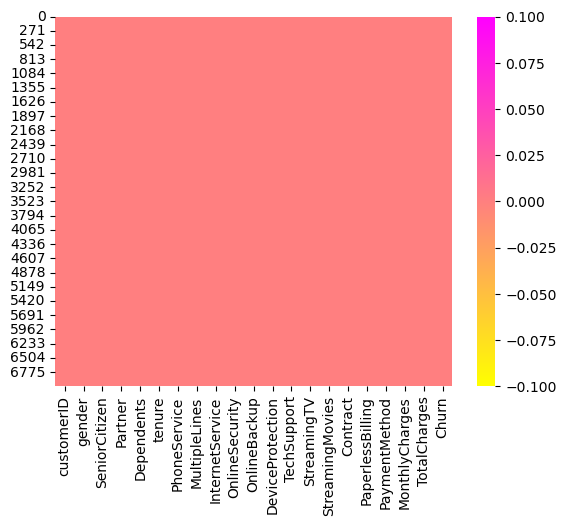

In [17]:
# Let's visualize it using heatmap
sns.heatmap(df.isnull(),cmap = 'spring_r')

In [18]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
# Checking the unique values of TotalCharges column
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [21]:
# Sum of unique vlues of TotalCharges columns
df['TotalCharges'].nunique()

6531

In [22]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

In [23]:
# Checking the space in TotalCharges column
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [24]:
# Replace the space with the np.nan in TotalCharges column
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'].value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
# Converting object datatype to float datatype in TotalCharges columns
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtypes

dtype('float64')

In [27]:
# Checking the null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
# Checking the mean of TotalCharges column
np.mean(df['TotalCharges'])

2283.3004408418656

In [29]:
# Filling null values in TotalCharges with its mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [32]:
# Checking the null values again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
# Verify that values is sucessfully filled
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [34]:
# Drop CustomerID columns
df = df.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
# Checking the uniques values of each columns
df.nunique().to_frame('NO. of unique values')

,NO. of unique values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [37]:
# Separating numerical and categorical columns

# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical columns",categorical_col)
print('\n')
        
# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print("Numerical Columns",numerical_col)

Categorical columns ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [38]:
# Checking the list of counts target
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
# Checking the uniques values in target columns
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [40]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Data Visualization

## Univariate Analysis

Churn
No     5174
Yes    1869
Name: count, dtype: int64


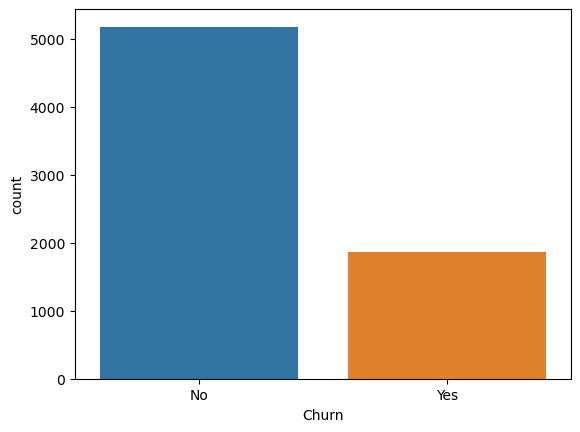

In [41]:
# Visualize the number of churned customers
print(df['Churn'].value_counts())
sns.countplot(x = 'Churn',data = df)
plt.show()

gender
Male      3555
Female    3488
Name: count, dtype: int64


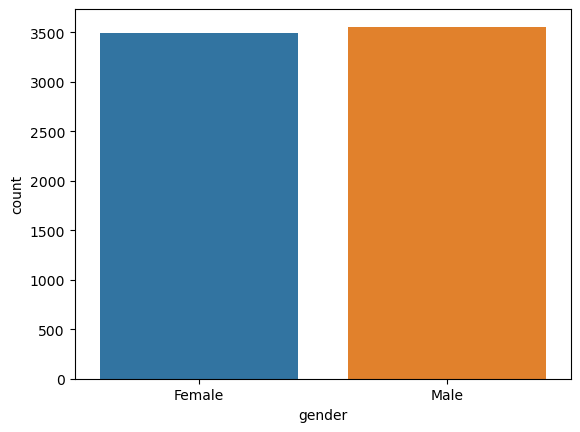

In [43]:
# Visuaizing the count of gender
print(df['gender'].value_counts())
sns.countplot(x = 'gender',data = df)
plt.show()

Partner
No     3641
Yes    3402
Name: count, dtype: int64


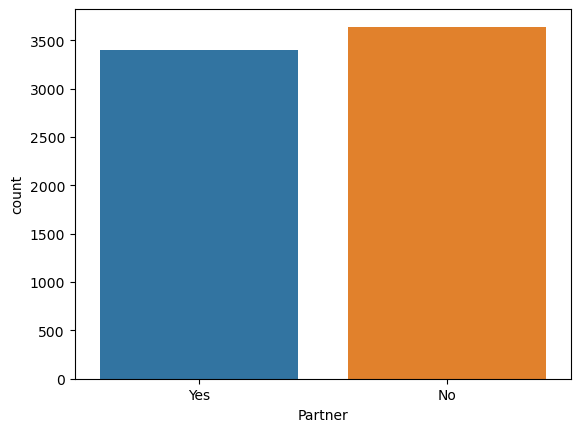

In [44]:
# Visualizing the count of Partner
print(df['Partner'].value_counts())
ax = sns.countplot(x = 'Partner', data = df)
plt.show()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


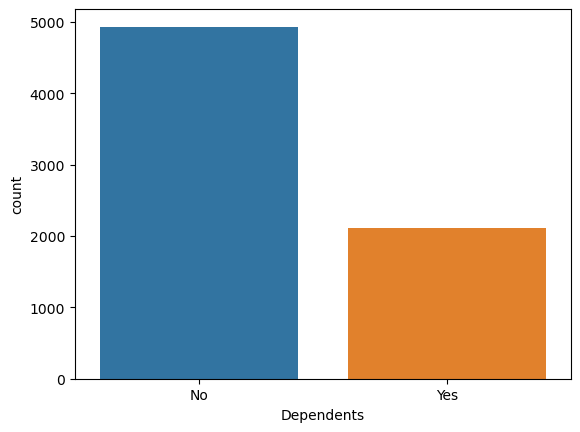

In [45]:
# Visualizing the count of Dependents
print(df['Dependents'].value_counts())
ax = sns.countplot(x = 'Dependents', data = df)
plt.show()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


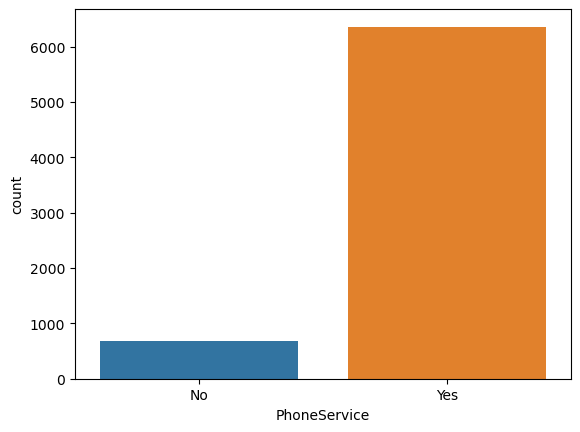

In [46]:
# Visualizing the count of PhoneService
print(df['PhoneService'].value_counts())
ax = sns.countplot(x = 'PhoneService', data = df)
plt.show()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


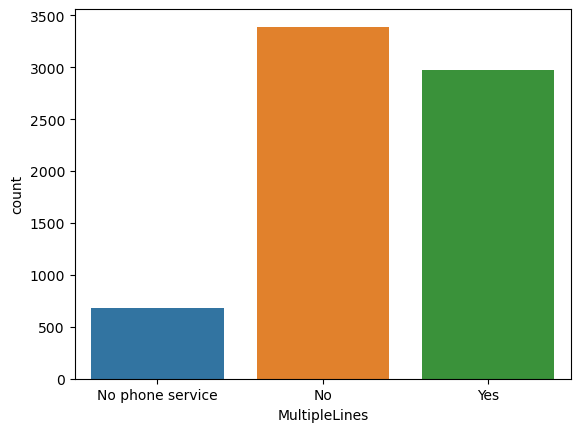

In [47]:
# Visualizing the count of MultipleLines
print(df['MultipleLines'].value_counts())
ax = sns.countplot(x = 'MultipleLines', data = df)
plt.show()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


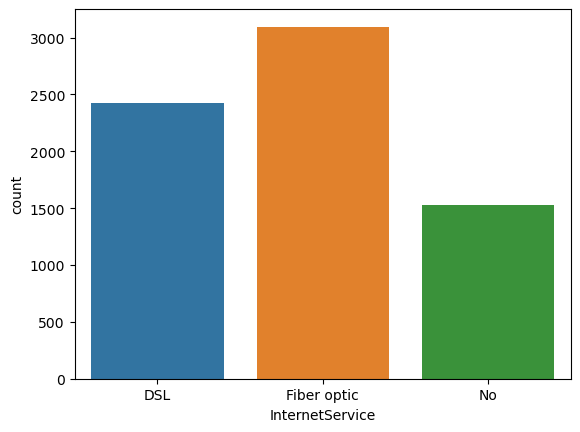

In [48]:
# Visualizing the count of InternetService
print(df['InternetService'].value_counts())
ax = sns.countplot(x = 'InternetService',data =df)
plt.show()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


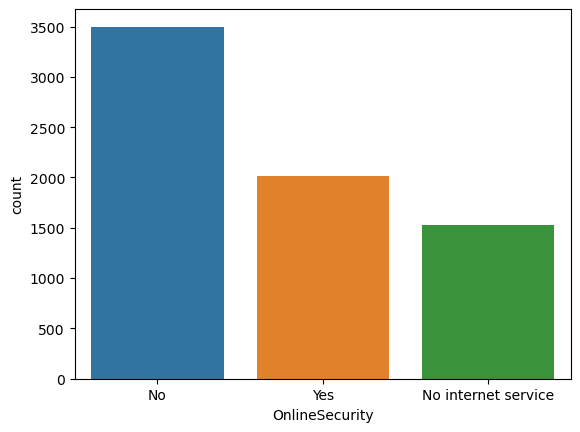

In [49]:
# Visualizing the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())
sns.countplot(x = 'OnlineSecurity', data = df)
plt.show()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


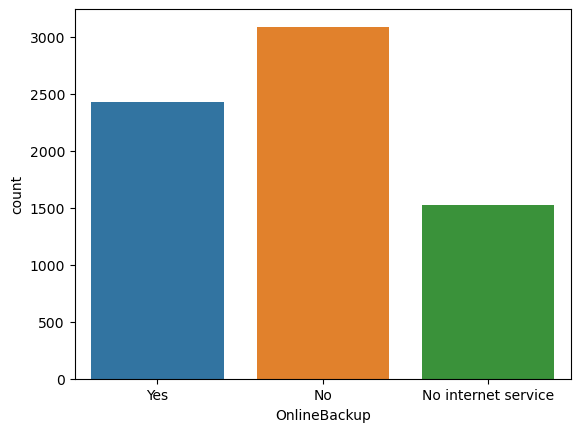

In [50]:
# Visualizing the count of OnlineBackup
print(df['OnlineBackup'].value_counts())
ax = sns.countplot(x = 'OnlineBackup', data = df)
plt.show()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


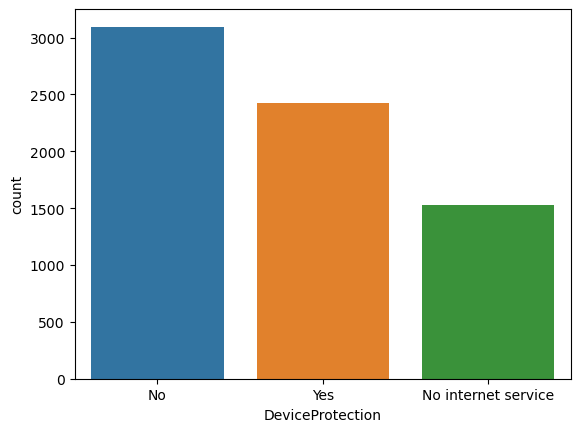

In [51]:
# Visualizing the count of DeviceProtection
print(df['DeviceProtection'].value_counts())
ax = sns.countplot(x = 'DeviceProtection', data = df)
plt.show()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


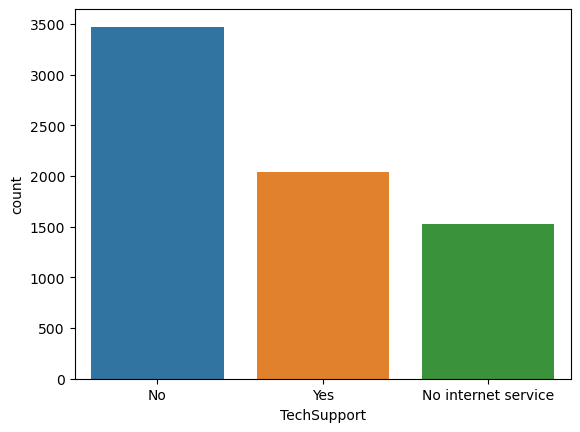

In [52]:
# Visualizing the count of TechSupport
print(df['TechSupport'].value_counts())
ax = sns.countplot(x = 'TechSupport', data = df)
plt.show()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


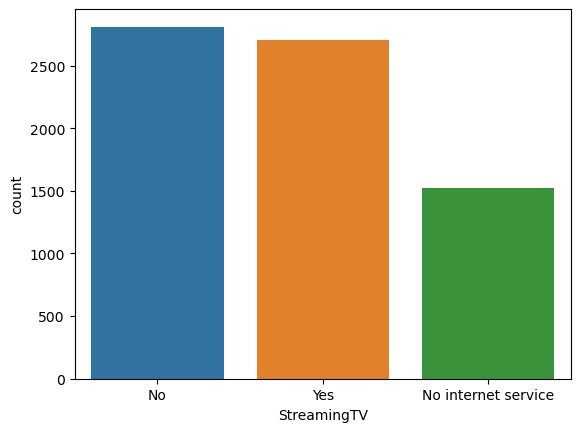

In [53]:
# Visualizing the count of StreamingTV
print(df['StreamingTV'].value_counts())
ax = sns.countplot(x = 'StreamingTV',data = df)
plt.show()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


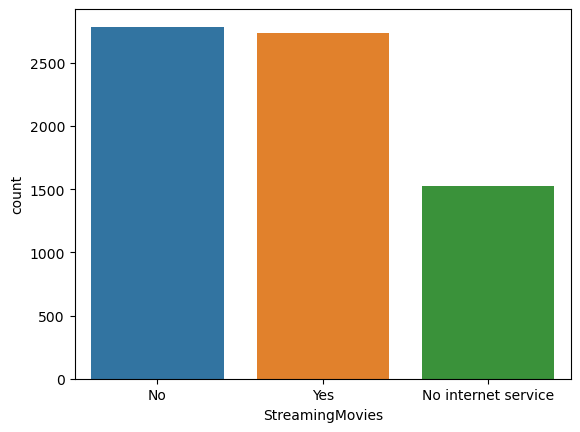

In [54]:
# Visualizing the count of StreamingMovies
print(df['StreamingMovies'].value_counts())
ax = sns.countplot(x = 'StreamingMovies', data = df)
plt.show()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


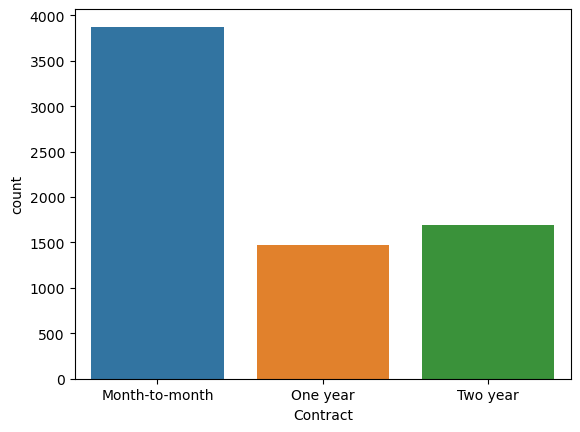

In [55]:
# Visualizing the count of Contract
print(df['Contract'].value_counts())
ax = sns.countplot(x = 'Contract',data = df)
plt.show()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


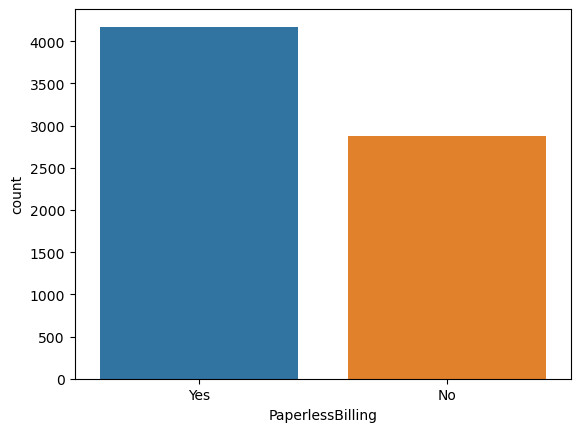

In [56]:
# Visualizing the count of PaperlessBilling
print(df['PaperlessBilling'].value_counts())
ax = sns.countplot(x = 'PaperlessBilling', data = df)
plt.show()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


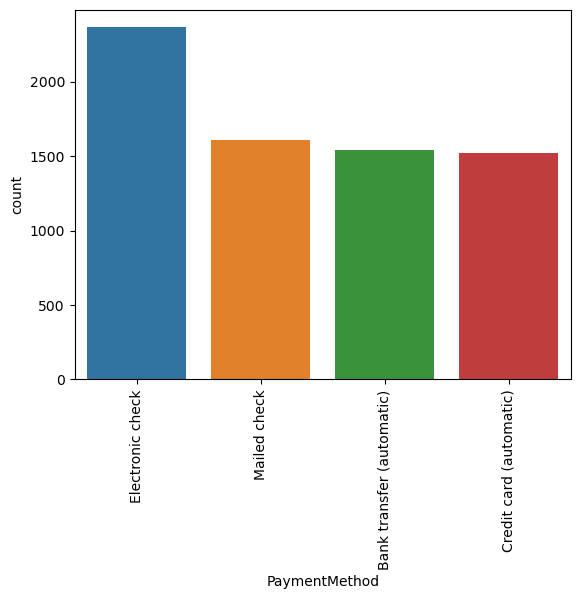

In [58]:
# Visualizing the countplot PaymentMethod
print(df['PaymentMethod'].value_counts())
ax = sns.countplot(x = 'PaymentMethod',data = df)
plt.xticks(rotation = 90)
plt.show()

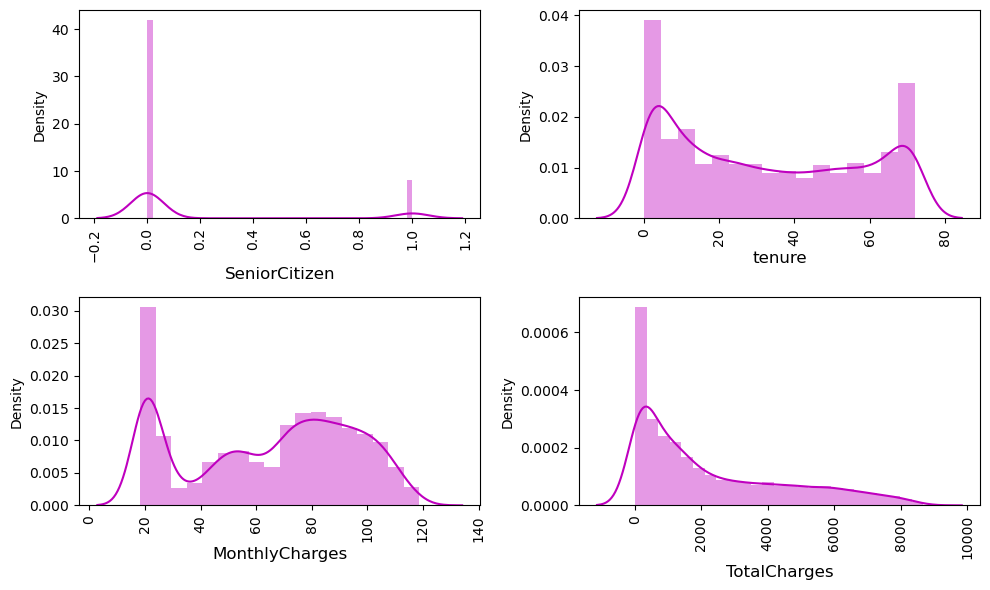

In [59]:
# Let's check how the data has been distributed in every columns
plt.figure(figsize=(10,6),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.xticks(rotation = 90, fontsize=10)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis

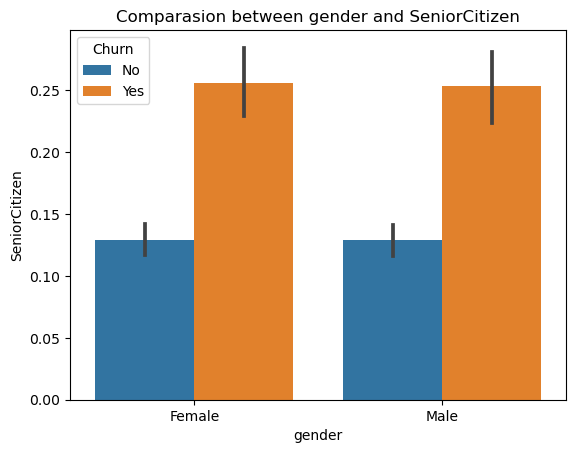

In [61]:
# Comparing gender vs SeniorCitizen
plt.title("Comparasion between gender and SeniorCitizen")
sns.barplot(x = 'gender',y='SeniorCitizen',data=df,hue = 'Churn')
plt.show()

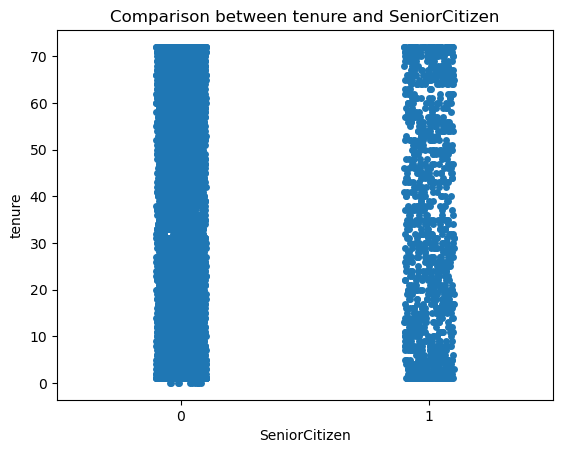

In [66]:
# Comparing tenure vs SniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = 'SeniorCitizen',y='tenure',data = df)
plt.show()

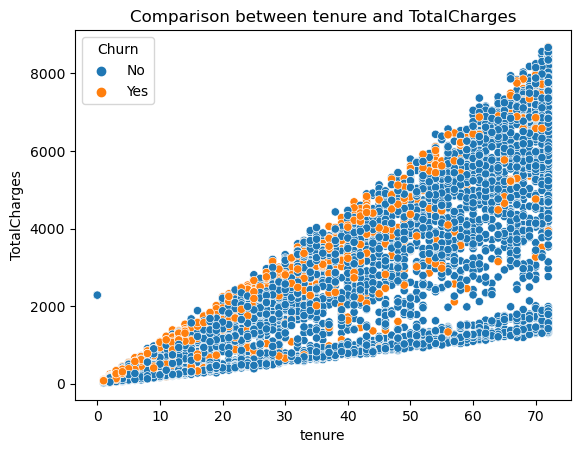

In [68]:
# Comparing between tenure vs TotalCharges
plt.title("Comparison between tenure and TotalCharges")
sns.scatterplot(x = 'tenure',y='TotalCharges',data = df,hue = 'Churn')
plt.show()

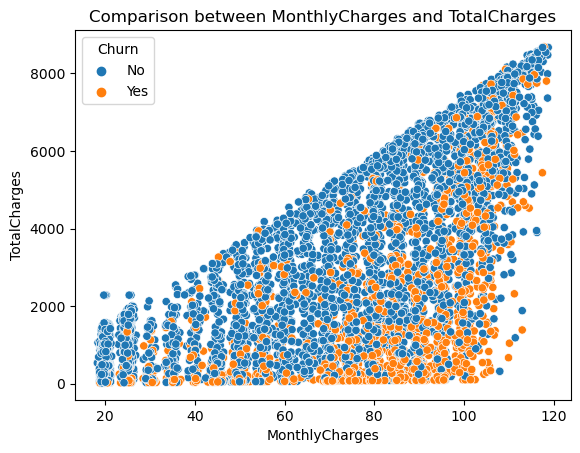

In [70]:
# Comparing between MonthlyCharges vs TotalCharges
plt.title("Comparison between MonthlyCharges and TotalCharges")
sns.scatterplot(x = 'MonthlyCharges',y = 'TotalCharges',data = df,hue = 'Churn')
plt.show()

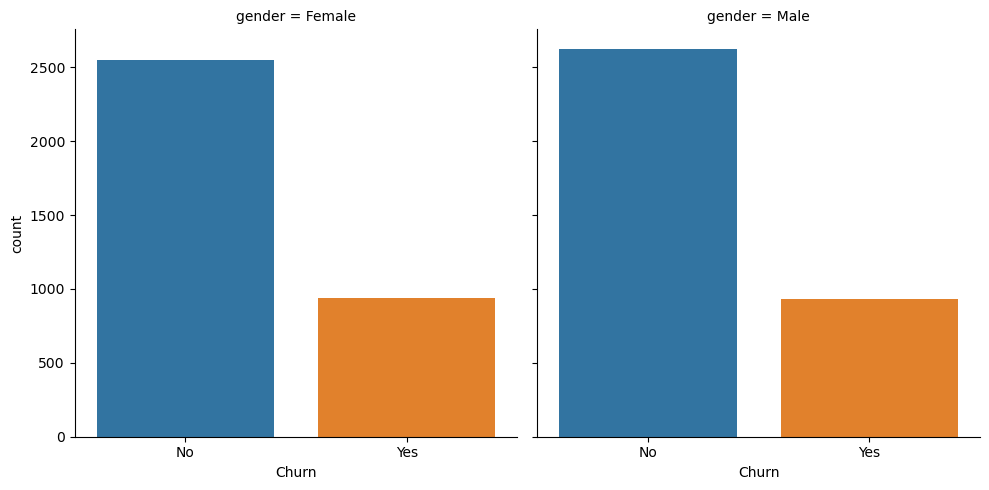

In [72]:
# checking Churn level and genders
sns.catplot(x = 'Churn', col = 'gender',data=df,kind = 'count')
plt.show()

## Multivariate Analysis

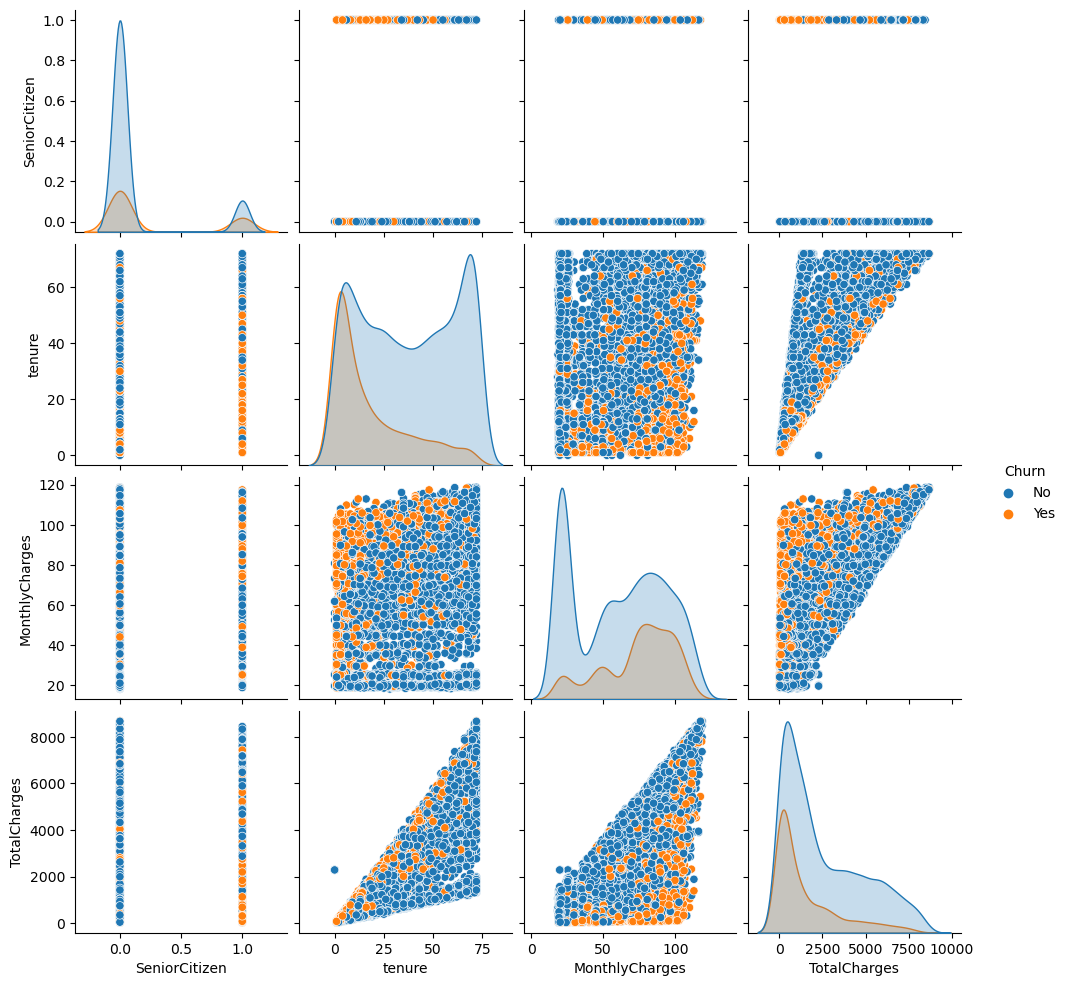

In [73]:
sns.pairplot(df, hue = 'Churn')
plt.show()

## Checking the Outliers

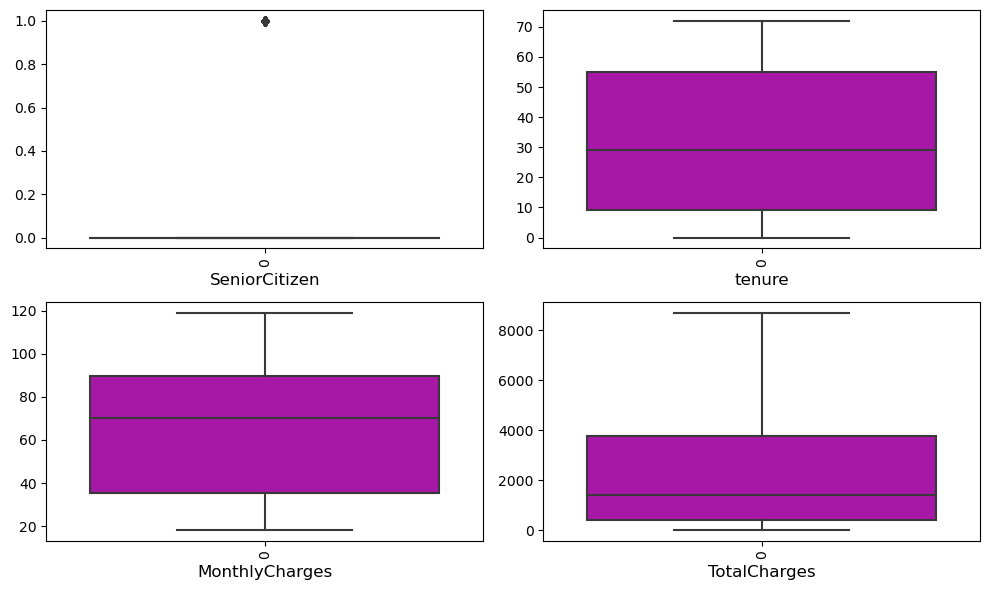

In [74]:
# Let's check the outliers by ploting boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.xticks(rotation = 90, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [82]:
# Check the skewness
df.skew()

TypeError: could not convert string to float: 'Female'